In [29]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.svm import LinearSVC




In [64]:
warnings.filterwarnings("ignore")
path = os.getcwd()
data = pd.read_csv(path+'\\homework-6-updated-link-niveditha-7\\Frogs_MFCCs.csv')

Choose 70% of the data randomly as the training set.

In [9]:
X = data.drop(['Family', 'Genus', 'Species'], axis=1)
Y = data[['Family', 'Genus', 'Species']]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [68]:
data.shape



(7195, 26)

In [67]:
X_test.shape

(2159, 23)

In [66]:
X_train.shape

(5036, 23)

Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-class classication is to train a
classifier for each label.

Research exact match and hamming score/ loss methods for evaluating multi-
label classication and use them in evaluating the classiers in this problem.

The Hamming loss is the fraction of labels that are incorrectly predicted. In multiclass classification, the Hamming loss corresponds to the Hamming distance between y_true and y_pred which is equivalent to the subset zero_one_loss function, when normalize parameter is set to True.

Reference-

https://stackoverflow.com/questions/32239577/getting-the-accuracy-for-multi-label-prediction-in-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Settingup parameter grid for GridSearchCV
param_grid = {
    'C': np.logspace(-3, 6, 5),  # logarithmic steps
    'gamma': np.linspace(0.1, 2, 5),
}
svm = SVC(kernel="rbf")
# Training an SVM for each label
Gaussian_results = {}
for label in Y.columns:
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)
    grid_search.fit(X_train_scaled, Y_train[label])  # Use normalized features
    best_model = grid_search.best_estimator_
    
    # Predicting on the test set
    Y_pred = best_model.predict(X_test_scaled)
    
    # Evaluation
    exact_match = accuracy_score(Y_test[[label]], Y_pred.reshape(-1, 1))
    hamming = hamming_loss(Y_test[[label]], Y_pred.reshape(-1, 1))
    
    Gaussian_results[label] = {'Best Params': grid_search.best_params_, 'Best Score': grid_search.best_score_,'Exact Match': exact_match, 'Hamming Loss': hamming}



In [57]:
# Output the results
for label, metrics in Gaussian_results.items():
    print(f"Label: {label}")
    for key, value in metrics.items():
        print(f"{key}: {value}")


Label: Family
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 0.9928512259774684
Exact Match: 0.9939786938397406
Hamming Loss: 0.006021306160259379
Label: Genus
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 0.9900706869891762
Exact Match: 0.9893469198703103
Hamming Loss: 0.010653080129689671
Label: Species
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 0.9872905424595286
Exact Match: 0.9856415006947661
Hamming Loss: 0.014358499305233904


Without scaling

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hamming_loss



# Setup parameter grid for GridSearchCV
param_grid = {
    'C': np.logspace(-3, 6, 5),  # logarithmic steps
    'gamma': np.linspace(0.1, 2, 5),
}
svm = SVC(kernel="rbf")
# Train an SVM for each label
results = {}
for label in Y.columns:
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)
    grid_search.fit(X_train, Y_train[label]) 
    best_model = grid_search.best_estimator_
    
    # Predict on the test set
    Y_pred = best_model.predict(X_test)
    
    # Evaluation
    exact_match = accuracy_score(Y_test[[label]], Y_pred.reshape(-1, 1))
    hamming = hamming_loss(Y_test[[label]], Y_pred.reshape(-1, 1))
    
    results[label] = {'Best Params': grid_search.best_params_, 'Best Score': grid_search.best_score_,'Exact Match': exact_match, 'Hamming Loss': hamming}

# Output the results
for label, metrics in results.items():
    print(f"Label: {label}")
    for key, value in metrics.items():
        print(f"{key}: {value}")


Label: Family
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 1.0
Exact Match: 0.999536822603057
Hamming Loss: 0.0004631773969430292
Label: Genus
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 1.0
Exact Match: 1.0
Hamming Loss: 0.0
Label: Species
Best Params: {'C': 31.622776601683793, 'gamma': 0.1}
Best Score: 1.0
Exact Match: 1.0
Hamming Loss: 0.0


Repeat 6(b)ii with L1-penalized SVMs.4 Remember to normalize the at-
tributes. (10 pts)

In [58]:

#normalising
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the SVM with L1 penalty
svm_model = LinearSVC(penalty='l1', dual=False, random_state=42)

# Parameter tuning with GridSearchCV
param_grid = {'C': np.logspace(-3, 6, 10)}
#grid_search = GridSearchCV(svm_model, param_grid, cv=10)
grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=10000), param_grid, cv=10)
L1_results = {}

for label in Y.columns:
    grid_search.fit(X_train_scaled, Y_train[label])
    best_model = grid_search.best_estimator_
    
    # Predict and evaluate
    Y_pred = best_model.predict(X_test_scaled)
    exact_match = accuracy_score(Y_test[label], Y_pred)
    hamming = hamming_loss(Y_test[label], Y_pred)

    L1_results[label] = {'Best Params': grid_search.best_params_, 'Exact Match': exact_match, 'Hamming Loss': hamming}

# Output the results
for label, metrics in L1_results.items():
    print(f"Label: {label}")
    for key, value in metrics.items():
        print(f"{key}: {value}")


Label: Family
Best Params: {'C': 1000.0}
Exact Match: 0.9629458082445577
Hamming Loss: 0.037054191755442334
Label: Genus
Best Params: {'C': 10.0}
Exact Match: 0.9828624363131079
Hamming Loss: 0.01713756368689208
Label: Species
Best Params: {'C': 1.0}
Exact Match: 0.9833256137100509
Hamming Loss: 0.01667438628994905


Repeat 6(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classiers you trained.

In [22]:
from imblearn.over_sampling import SMOTE

In [60]:

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
C = np.logspace(-3, 6, 10)
SmoteSVMModel = LinearSVC(penalty='l1', dual=False)
SmoteParameters = {'C':C}
Smote_results = {}
labels_to_process = ['Family' , 'Genus', 'Species']
grid_search =  GridSearchCV(SmoteSVMModel, SmoteParameters, cv=10)
#multi-label
for label in labels_to_process:
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, Y_train[label])
    print(label)
    #display(X_train_smote.shape)
    LabelisedSmoteSVMModel = grid_search.fit(X_train_smote, y_train_smote)
    # Predictions and Evaluation
    y_pred = LabelisedSmoteSVMModel.predict(X_test_scaled)
    exact_match = accuracy_score(Y_test[label], y_pred)
    hamming = hamming_loss(Y_test[label], y_pred)

    Smote_results[label] = {'Best Params': grid_search.best_params_,'Exact Match': exact_match, 'Hamming Loss': hamming}

# Display the results
for label, metrics in Smote_results.items():
    print(f"Label: {label}")
    for key, value in metrics.items():
        print(f"{key}: {value}")

Family
Genus
Species
Label: Family
Best Params: {'C': 10.0}
Exact Match: 0.9453450671607225
Hamming Loss: 0.05465493283927744
Label: Genus
Best Params: {'C': 100.0}
Exact Match: 0.9786938397406206
Hamming Loss: 0.021306160259379342
Label: Species
Best Params: {'C': 1000.0}
Exact Match: 0.98471514590088
Hamming Loss: 0.015284854099119963


In [61]:
def calculate_averages(results):
    exact_match_scores = [details['Exact Match'] for details in results.values()]
    hamming_loss_scores = [details['Hamming Loss'] for details in results.values()]

    average_exact_match = sum(exact_match_scores) / len(exact_match_scores) if exact_match_scores else 0
    average_hamming_loss = sum(hamming_loss_scores) / len(hamming_loss_scores) if hamming_loss_scores else 0

    return average_exact_match, average_hamming_loss


In [63]:

average_exact_match, average_hamming_loss = calculate_averages(Smote_results)
print(f"Average L1-SVM-Smote Exact Match: {average_exact_match:.4f}")
print(f"Average L1-SVM-Smote Hamming Loss: {average_hamming_loss:.4f}")

average_exact_match_l, average_hamming_loss_l = calculate_averages(L1_results)
print(f"Average L1-SVM Exact Match: {average_exact_match_l:.4f}")
print(f"Average L1-SVM Hamming Loss: {average_hamming_loss_l:.4f}")

average_exact_match_g, average_hamming_loss_g = calculate_averages(Gaussian_results)
print(f"Average Gaussian Exact Match: {average_exact_match_g:.4f}")
print(f"Average Gaussian Hamming Loss: {average_hamming_loss_g:.4f}")


Average L1-SVM-Smote Exact Match: 0.9696
Average L1-SVM-Smote Hamming Loss: 0.0304
Average L1-SVM Exact Match: 0.9764
Average L1-SVM Hamming Loss: 0.0236
Average Gaussian Exact Match: 0.9897
Average Gaussian Hamming Loss: 0.0103


Comparison-

The Gaussian method shows the highest Exact Match score and lowest hamming loss indicating it correctly identifies the labels most accurately and makes fewer mistakes across all labels on average among the three methods.
The L1-SVM without SMOTE performs better than the L1-SVM with SMOTE, suggesting that in this scenario, SMOTE may not be benefiting the model, possibly due to overfitting or improper handling of synthetic examples.

The Gaussian method's performance might be due to its ability to handle the underlying distributions of the data more effectively than the linear models. This suggests that the relationships or boundaries between classes in your data could be nonlinear, which Gaussian kernels can handle well.

In [2]:
import numpy as np
from cvxopt import matrix, solvers

# Define Q, p, G, h, A, b
Q = matrix(np.array([
    [1, -1, -1, -1],
    [-1, 4, 1, 0],
    [-1, 1, 4, 1],
    [-1, 0, 1, 4]
], dtype=float))

p = matrix(np.array([-1, -1, -1, -1], dtype=float))

G = matrix(np.diag([-1.0, -1.0, -1.0, -1.0]))
h = matrix(np.zeros(4))

A = matrix(np.array([[-1, 1, 1, 1]], dtype=float))
b = matrix(np.array([0.0]))

# Solve the quadratic program
sol = solvers.qp(Q, p, G, h, A, b)

# Extract the solution
alphas = np.array(sol['x']).flatten()
print("Optimal alphas:", alphas)


     pcost       dcost       gap    pres   dres
 0: -1.5690e+00 -4.0870e+00  3e+00  1e-16  2e+00
 1: -2.1968e+00 -2.2704e+00  7e-02  2e-16  4e-01
 2: -2.6664e+00 -2.7179e+00  5e-02  4e-16  3e-16
 3: -2.6667e+00 -2.6672e+00  5e-04  5e-16  5e-16
 4: -2.6667e+00 -2.6667e+00  5e-06  2e-16  4e-16
 5: -2.6667e+00 -2.6667e+00  5e-08  2e-16  3e-16
Optimal solution found.
Optimal alphas: [2.66666669 1.00000001 0.66666668 1.00000001]


home work-6 Question 4 cross check.

In [3]:
import numpy as np
from cvxopt import matrix, solvers

# Define Q, p, G, h, A, b
Q = matrix(np.array([
    [1, -1, -1, -1],
    [-1, 4, 1, 0],
    [-1, 1, 4, 1],
    [-1, 0, 1, 4]
], dtype=float))

p = matrix(np.array([-1, -1, -1, -1], dtype=float))

G = matrix(np.diag([-1.0, -1.0, -1.0, -1.0]))
h = matrix(np.zeros(4))

A = matrix(np.array([[-1, 1, 1, 1]], dtype=float))
b = matrix(np.array([0.0]))

# Solve the quadratic program
sol = solvers.qp(Q, p, G, h, A, b)

# Extract the solution
alphas = np.array(sol['x']).flatten()
print("Optimal alphas:", alphas)


     pcost       dcost       gap    pres   dres
 0: -1.5690e+00 -4.0870e+00  3e+00  1e-16  2e+00
 1: -2.1968e+00 -2.2704e+00  7e-02  2e-16  4e-01
 2: -2.6664e+00 -2.7179e+00  5e-02  4e-16  3e-16
 3: -2.6667e+00 -2.6672e+00  5e-04  5e-16  5e-16
 4: -2.6667e+00 -2.6667e+00  5e-06  2e-16  4e-16
 5: -2.6667e+00 -2.6667e+00  5e-08  2e-16  3e-16
Optimal solution found.
Optimal alphas: [2.66666669 1.00000001 0.66666668 1.00000001]


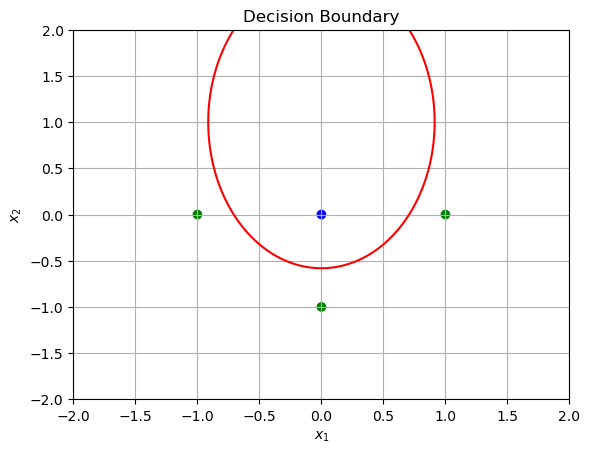

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Kernel function
def kappa(x, y):
    return (np.dot(x, y) + 1)**2

# Decision function
def decision_function(x):
    k1 = kappa(np.array([0, 0]), x)
    k2 = kappa(np.array([1, 0]), x)
    k3 = kappa(np.array([0, -1]), x)
    k4 = kappa(np.array([-1, 0]), x)
    return (-2.66666669 * k1 + 1.0000001 * k2 + 0.66666668 * k3 + 1.0000001 * k4 - 1.00000039)

# Plotting decision boundary
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = decision_function(np.array([X[i, j], Y[i, j]]))

plt.contour(X, Y, Z, levels=[0], colors='r')
plt.scatter([0, 1, 0, -1], [0, 0, -1, 0], c=['b', 'g', 'g', 'g'], marker='o')
plt.title('Decision Boundary')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()


In [8]:
import numpy as np
from sklearn.svm import SVC

# Given data points and labels
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

# Nonlinear transformation functions
def phi1(x):
    return x[1]**2 - 2*x[0] + 3

def phi2(x):
    return x[0]**2 - 2*x[1] - 3

# Transform the data
U = np.array([[phi1(x), phi2(x)] for x in X])

# Fit the SVM model
svm = SVC(kernel='linear')  # Large C for hard-margin SVM
svm.fit(U, y)

# Extract weights and bias (intercept)
w = svm.coef_[0]
b = svm.intercept_[0]

print(f"w1: {w[0]}")
print(f"w2: {w[1]}")
print(f"b: {b}")

# Equation of the hyperplane: w1*u1 + w2*u2 + b = 0
# Simplified as: w[0]*phi1(x) + w[1]*phi2(x) + b = 0
print(f"Hyperplane equation: {w[0]}*phi1(x) + {w[1]}*phi2(x) + {b} = 0")


w1: 1.0
w2: 0.0
b: -5.0
Hyperplane equation: 1.0*phi1(x) + 0.0*phi2(x) + -5.0 = 0


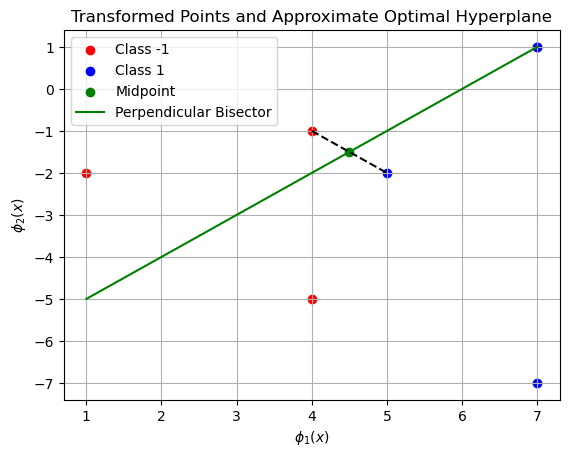

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Transformed points
points_class_1 = np.array([[1, -2], [4, -5], [4, -1]])
points_class_2 = np.array([[5, -2], [7, -7], [7, 1], [7, 1]])

# Plot points
plt.scatter(points_class_1[:, 0], points_class_1[:, 1], color='red', label='Class -1')
plt.scatter(points_class_2[:, 0], points_class_2[:, 1], color='blue', label='Class 1')

# Identify and plot the closest points
min_dist = float('inf')
closest_pair = (None, None)

for p1 in points_class_1:
    for p2 in points_class_2:
        dist = np.linalg.norm(p1 - p2)
        if dist < min_dist:
            min_dist = dist
            closest_pair = (p1, p2)

# Plot the closest points and the midpoint
p1, p2 = closest_pair
midpoint = (p1 + p2) / 2

plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--')
plt.scatter(midpoint[0], midpoint[1], color='green', label='Midpoint')

# Plot the perpendicular bisector
slope = (p2[1] - p1[1]) / (p2[0] - p1[0])
perpendicular_slope = -1 / slope
intercept = midpoint[1] - perpendicular_slope * midpoint[0]

x_vals = np.linspace(min(points_class_1[:, 0].min(), points_class_2[:, 0].min()),
                     max(points_class_1[:, 0].max(), points_class_2[:, 0].max()), 100)
y_vals = perpendicular_slope * x_vals + intercept

plt.plot(x_vals, y_vals, 'g-', label='Perpendicular Bisector')

plt.xlabel('$\phi_1(x)$')
plt.ylabel('$\phi_2(x)$')
plt.legend()
plt.title('Transformed Points and Approximate Optimal Hyperplane')
plt.grid(True)
plt.show()


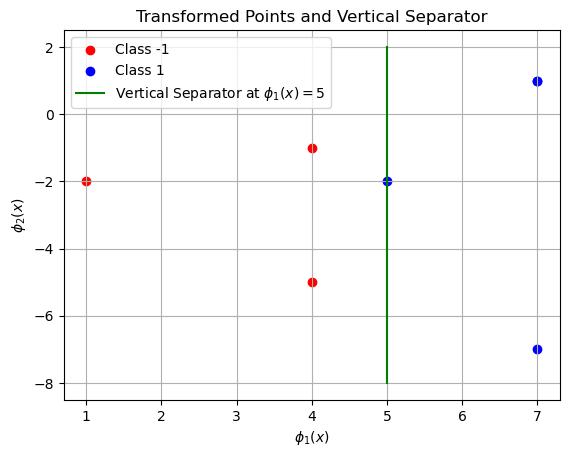

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Transformed points
points_class_1 = np.array([[1, -2], [4, -5], [4, -1]])
points_class_2 = np.array([[5, -2], [7, -7], [7, 1], [7, 1]])

# Plot points
plt.scatter(points_class_1[:, 0], points_class_1[:, 1], color='red', label='Class -1')
plt.scatter(points_class_2[:, 0], points_class_2[:, 1], color='blue', label='Class 1')

# Plot the vertical line at φ1(x) = 5
x_vals = np.full(100, 5)
y_vals = np.linspace(-8, 2, 100)

plt.plot(x_vals, y_vals, 'g-', label='Vertical Separator at $\phi_1(x)=5$')

plt.xlabel('$\phi_1(x)$')
plt.ylabel('$\phi_2(x)$')
plt.legend()
plt.title('Transformed Points and Vertical Separator')
plt.grid(True)
plt.show()


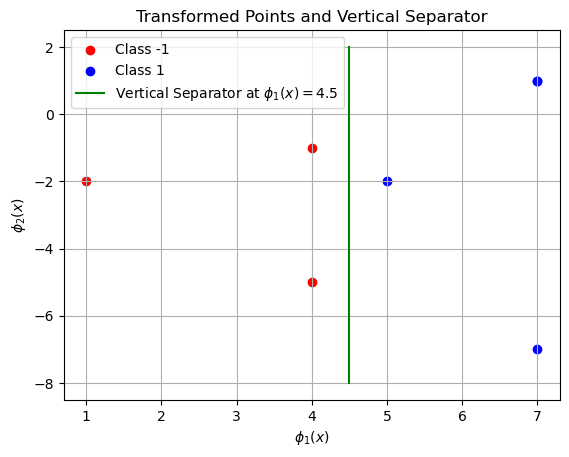

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Transformed points
points_class_1 = np.array([[1, -2], [4, -5], [4, -1]])
points_class_2 = np.array([[5, -2], [7, -7], [7, 1], [7, 1]])

# Plot points
plt.scatter(points_class_1[:, 0], points_class_1[:, 1], color='red', label='Class -1')
plt.scatter(points_class_2[:, 0], points_class_2[:, 1], color='blue', label='Class 1')

# Plot the vertical line at φ1(x) = 4.5
x_vals = np.full(100, 4.5)
y_vals = np.linspace(-8, 2, 100)

plt.plot(x_vals, y_vals, 'g-', label='Vertical Separator at $\phi_1(x)=4.5$')

plt.xlabel('$\phi_1(x)$')
plt.ylabel('$\phi_2(x)$')
plt.legend()
plt.title('Transformed Points and Vertical Separator')
plt.grid(True)
plt.show()


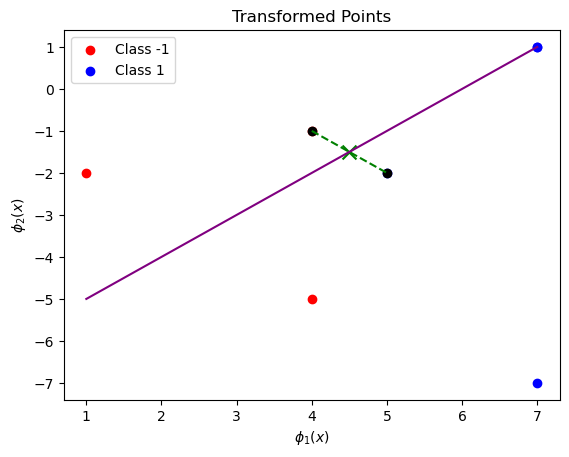

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Transformed points
U = np.array([[1, -2], [4, -5], [4, -1], [5, -2], [7, -7], [7, 1], [7, 1]])
labels = np.array([-1, -1, -1, 1, 1, 1, 1])

# Separate points by class
U_neg = U[labels == -1]
U_pos = U[labels == 1]

# Plot the points
plt.scatter(U_neg[:, 0], U_neg[:, 1], color='red', label='Class -1')
plt.scatter(U_pos[:, 0], U_pos[:, 1], color='blue', label='Class 1')
plt.xlabel('$\phi_1(x)$')
plt.ylabel('$\phi_2(x)$')
plt.legend()
plt.title('Transformed Points')

# Find the shortest distance between the two classes
min_distance = float('inf')
closest_pair = (None, None)
for u1 in U_neg:
    for u2 in U_pos:
        distance = np.linalg.norm(u1 - u2)
        if distance < min_distance:
            min_distance = distance
            closest_pair = (u1, u2)

# Plot the closest points and the line connecting them
u1, u2 = closest_pair
plt.scatter(u1[0], u1[1], color='black')
plt.scatter(u2[0], u2[1], color='black')
plt.plot([u1[0], u2[0]], [u1[1], u2[1]], color='green', linestyle='--')

# Find the midpoint
midpoint = (u1 + u2) / 2

# Draw the perpendicular line (approximated hyperplane)
slope = (u2[1] - u1[1]) / (u2[0] - u1[0])
perp_slope = -1 / slope
x_vals = np.linspace(min(U[:, 0]), max(U[:, 0]), 100)
y_vals = perp_slope * (x_vals - midpoint[0]) + midpoint[1]
plt.plot(x_vals, y_vals, color='purple', linestyle='-')

plt.scatter(midpoint[0], midpoint[1], color='green', marker='x', s=100)
plt.show()


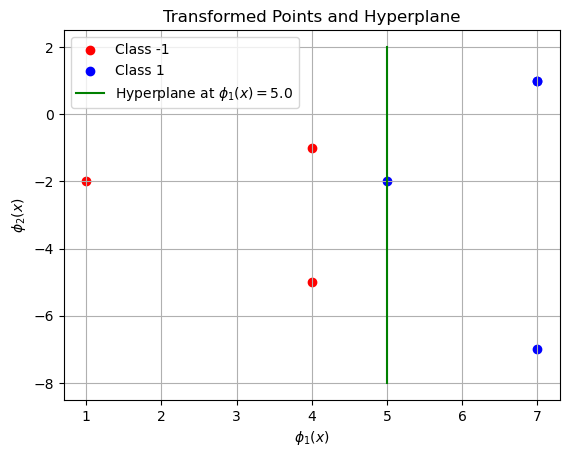

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Transformed points
points_class_1 = np.array([[1, -2], [4, -5], [4, -1]])
points_class_2 = np.array([[5, -2], [7, -7], [7, 1], [7, 1]])

# Plot points
plt.scatter(points_class_1[:, 0], points_class_1[:, 1], color='red', label='Class -1')
plt.scatter(points_class_2[:, 0], points_class_2[:, 1], color='blue', label='Class 1')

# Plot the hyperplane at φ1(x) = 5.0
x_vals = np.full(100, 5.0)
y_vals = np.linspace(-8, 2, 100)

plt.plot(x_vals, y_vals, 'g-', label='Hyperplane at $\phi_1(x)=5.0$')

plt.xlabel('$\phi_1(x)$')
plt.ylabel('$\phi_2(x)$')
plt.legend()
plt.title('Transformed Points and Hyperplane')
plt.grid(True)
plt.show()
